In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import StandardScaler 

In [2]:
us_sales_data = pd.read_csv("US_Regional_Sales_Data.csv")

In [3]:
us_sales_data

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,26/9/20,30/12/20,7/1/21,14/1/21,USD,9,41,339,29,1,0.075,121.94,234.5
7987,SO - 0008088,Online,WARE-NMK1003,26/9/20,30/12/20,2/1/21,4/1/21,USD,14,29,202,3,6,0.050,"1,921.56","3,202.60"
7988,SO - 0008089,Online,WARE-UHY1004,26/9/20,30/12/20,23/1/21,26/1/21,USD,14,32,241,35,5,0.200,"2,792.76","3,825.70"
7989,SO - 0008090,Online,WARE-NMK1003,26/9/20,30/12/20,20/1/21,25/1/21,USD,20,42,112,36,8,0.100,804,"1,072.00"


In [4]:
for column in us_sales_data:
    if column not in ['OrderDate', 'ShipDate', 'DeliveryDate']:
        print(column, len(us_sales_data[column].unique()))

OrderNumber 7991
Sales Channel 4
WarehouseCode 6
ProcuredDate 11
CurrencyCode 1
_SalesTeamID 28
_CustomerID 50
_StoreID 367
_ProductID 47
Order Quantity 8
Discount Applied 7
Unit Cost 5252
Unit Price 664


In [5]:
us_sales_data = us_sales_data.drop(labels = ['OrderNumber', 'ProcuredDate', 'CurrencyCode'], axis=1)
us_sales_data

,Sales Channel,WarehouseCode,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,In-Store,WARE-UHY1004,31/5/18,14/6/18,19/6/18,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,Online,WARE-NMK1003,31/5/18,22/6/18,2/7/18,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,Distributor,WARE-UHY1004,31/5/18,21/6/18,1/7/18,21,16,213,16,1,0.050,781.22,"1,775.50"
3,Wholesale,WARE-NMK1003,31/5/18,2/6/18,7/6/18,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,Distributor,WARE-NMK1003,31/5/18,16/6/18,26/6/18,22,49,111,26,8,0.100,"1,476.14","1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,In-Store,WARE-MKL1006,30/12/20,7/1/21,14/1/21,9,41,339,29,1,0.075,121.94,234.5
7987,Online,WARE-NMK1003,30/12/20,2/1/21,4/1/21,14,29,202,3,6,0.050,"1,921.56","3,202.60"
7988,Online,WARE-UHY1004,30/12/20,23/1/21,26/1/21,14,32,241,35,5,0.200,"2,792.76","3,825.70"
7989,Online,WARE-NMK1003,30/12/20,20/1/21,25/1/21,20,42,112,36,8,0.100,804,"1,072.00"


In [6]:
us_sales_data['DaysToShip'] = (pd.to_datetime(us_sales_data['ShipDate'],format = '%d/%m/%y') - pd.to_datetime(us_sales_data['OrderDate'], format = '%d/%m/%y')) / np.timedelta64(1, 'D')

In [7]:
us_sales_data['DaysToShip']

0       14.0
1       22.0
2       21.0
3        2.0
4       16.0
        ... 
7986     8.0
7987     3.0
7988    24.0
7989    21.0
7990    14.0
Name: DaysToShip, Length: 7991, dtype: float64

In [8]:
daysToShip = np.array(us_sales_data['DaysToShip'])
daysToShip[daysToShip < 0]

array([], dtype=float64)

In [9]:
us_sales_data['DaysToDeliver'] = (pd.to_datetime(us_sales_data['DeliveryDate'],format = '%d/%m/%y') - pd.to_datetime(us_sales_data['ShipDate'], format = '%d/%m/%y')) / np.timedelta64(1, 'D')

In [10]:
daysToDeliver = np.array(us_sales_data['DaysToDeliver'])
daysToDeliver[daysToDeliver < 0]

array([], dtype=float64)

In [11]:
# Missing Values
for column in us_sales_data:
    print(f"{column} : {us_sales_data[column].isna().sum()}")

Sales Channel : 0
WarehouseCode : 0
OrderDate : 0
ShipDate : 0
DeliveryDate : 0
_SalesTeamID : 0
_CustomerID : 0
_StoreID : 0
_ProductID : 0
Order Quantity : 0
Discount Applied : 0
Unit Cost : 0
Unit Price : 0
DaysToShip : 0
DaysToDeliver : 0


In [12]:
online_data = us_sales_data[us_sales_data['Sales Channel']=='Online']
online_data.describe()

,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,DaysToShip,DaysToDeliver
count,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000
mean,16.099381,25.671340,181.110103,23.548041,4.493608,0.116443,15.327010,5.546804
std,2.442663,14.315358,106.108913,13.590952,2.333582,0.087950,7.813568,2.871343
min,12.000000,1.000000,1.000000,1.000000,1.000000,0.050000,2.000000,1.000000
25%,14.000000,13.000000,87.000000,12.000000,2.000000,0.050000,9.000000,3.000000
50%,16.000000,26.000000,180.000000,23.000000,4.000000,0.075000,15.000000,5.000000
75%,18.000000,38.000000,275.000000,35.000000,7.000000,0.150000,22.000000,8.000000
max,20.000000,50.000000,367.000000,47.000000,8.000000,0.400000,28.000000,10.000000


In [13]:
wholesale_data = us_sales_data[us_sales_data['Sales Channel']=='Wholesale']
wholesale_data.describe()

,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,DaysToShip,DaysToDeliver
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,26.774916,25.331467,182.483763,23.741321,4.591265,0.113186,14.947368,5.460246
std,0.948067,14.461712,102.919975,13.600203,2.335583,0.084018,7.649154,2.878293
min,25.000000,1.000000,1.000000,1.000000,1.000000,0.050000,2.000000,1.000000
25%,26.000000,12.000000,92.000000,12.000000,3.000000,0.050000,9.000000,3.000000
50%,27.000000,26.000000,178.000000,24.000000,5.000000,0.075000,15.000000,5.000000
75%,28.000000,38.000000,270.000000,36.000000,7.000000,0.150000,21.000000,8.000000
max,28.000000,50.000000,366.000000,47.000000,8.000000,0.400000,28.000000,10.000000


In [14]:
distributor_data = us_sales_data[us_sales_data['Sales Channel']=='Distributor']
distributor_data.describe()

,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,DaysToShip,DaysToDeliver
count,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000
mean,22.698182,25.290909,186.717091,24.167273,4.572364,0.112909,15.252364,5.619636
std,1.468184,14.479912,106.173134,13.391907,2.333315,0.084764,7.869636,2.872354
min,20.000000,1.000000,1.000000,1.000000,1.000000,0.050000,2.000000,1.000000
25%,21.000000,12.500000,95.000000,13.000000,3.000000,0.050000,8.000000,3.000000
50%,23.000000,25.000000,186.000000,24.000000,5.000000,0.075000,16.000000,6.000000
75%,24.000000,38.000000,281.000000,36.000000,7.000000,0.150000,22.000000,8.000000
max,25.000000,50.000000,367.000000,47.000000,8.000000,0.400000,28.000000,10.000000


In [15]:
in_store_data = us_sales_data[us_sales_data['Sales Channel']=='In-Store']
in_store_data.describe()

,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,DaysToShip,DaysToDeliver
count,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000
mean,6.302001,25.402668,185.039418,23.779563,4.511219,0.113834,15.077926,5.436022
std,3.333873,14.452638,106.432261,13.517294,2.282457,0.084553,7.787420,2.830410
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,2.000000,1.000000
25%,3.000000,13.000000,91.000000,12.000000,3.000000,0.050000,8.000000,3.000000
50%,6.000000,25.000000,186.000000,24.000000,4.000000,0.075000,15.000000,5.000000
75%,9.000000,38.000000,278.000000,35.750000,7.000000,0.150000,22.000000,8.000000
max,12.000000,50.000000,367.000000,47.000000,8.000000,0.400000,28.000000,10.000000


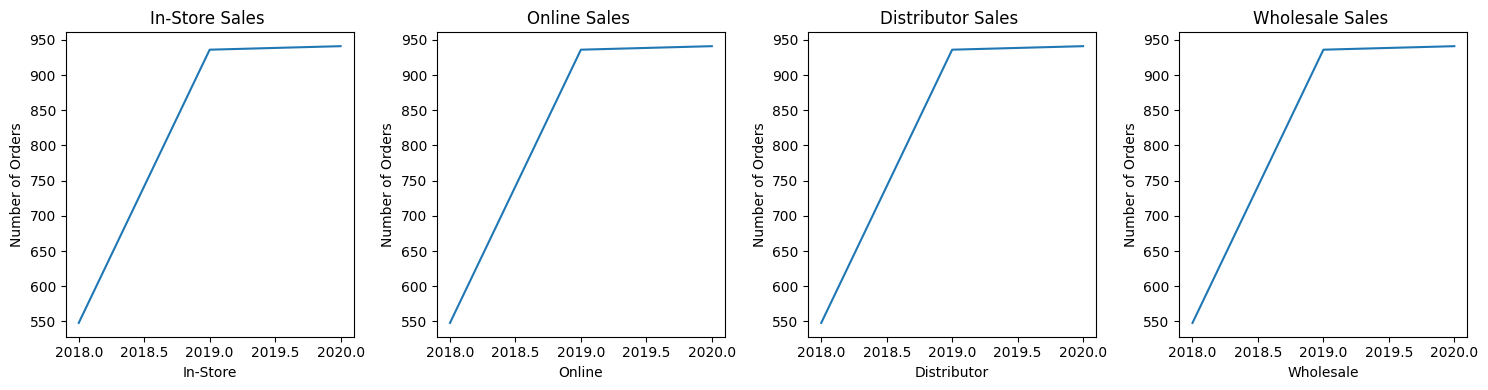

In [16]:
fig, ax = plt.subplots(1, 4, figsize=(15, 4))
us_sales_data['OrderDate'] = pd.to_datetime(us_sales_data['OrderDate'],format = '%d/%m/%y')
us_sales_data["OrderYear"] = us_sales_data['OrderDate'].dt.year
for i, channel in enumerate(us_sales_data['Sales Channel'].unique()):
    count = []
    dummy = us_sales_data[us_sales_data["Sales Channel"] == "Online"]
    count.append(dummy[dummy['OrderYear'] == 2018].shape[0])
    count.append(dummy[dummy['OrderYear'] == 2019].shape[0])
    count.append(dummy[dummy['OrderYear'] == 2020].shape[0])
    ax[i].plot(us_sales_data["OrderYear"].unique(), count)
    ax[i].set_title(f"{channel} Sales ")
    ax[i].set_ylabel("Number of Orders")
    ax[i].set_xlabel(f"{channel}")

# Adjust layout and spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

In [17]:
num_orders_year = us_sales_data[['Sales Channel', 'OrderYear', '_ProductID']].groupby(['Sales Channel', 'OrderYear'])
product_count = num_orders_year.count()
list(product_count.index.droplevel(1).unique())

['Distributor', 'In-Store', 'Online', 'Wholesale']

In [18]:
us_sales_data = us_sales_data.drop(labels = ['OrderDate', 'ShipDate', 'DeliveryDate'], axis=1)
us_sales_data

,Sales Channel,WarehouseCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,DaysToShip,DaysToDeliver,OrderYear
0,In-Store,WARE-UHY1004,6,15,259,12,5,0.075,"1,001.18","1,963.10",14.0,5.0,2018
1,Online,WARE-NMK1003,14,20,196,27,3,0.075,"3,348.66","3,939.60",22.0,10.0,2018
2,Distributor,WARE-UHY1004,21,16,213,16,1,0.050,781.22,"1,775.50",21.0,10.0,2018
3,Wholesale,WARE-NMK1003,28,48,107,23,8,0.075,"1,464.69","2,324.90",2.0,5.0,2018
4,Distributor,WARE-NMK1003,22,49,111,26,8,0.100,"1,476.14","1,822.40",16.0,10.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,In-Store,WARE-MKL1006,9,41,339,29,1,0.075,121.94,234.5,8.0,7.0,2020
7987,Online,WARE-NMK1003,14,29,202,3,6,0.050,"1,921.56","3,202.60",3.0,2.0,2020
7988,Online,WARE-UHY1004,14,32,241,35,5,0.200,"2,792.76","3,825.70",24.0,3.0,2020
7989,Online,WARE-NMK1003,20,42,112,36,8,0.100,804,"1,072.00",21.0,5.0,2020


In [19]:
us_sales_data[us_sales_data["Sales Channel"]=="In-Store"]

,Sales Channel,WarehouseCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,DaysToShip,DaysToDeliver,OrderYear
0,In-Store,WARE-UHY1004,6,15,259,12,5,0.075,"1,001.18","1,963.10",14.0,5.0,2018
6,In-Store,WARE-XYS1001,10,14,6,5,4,0.150,536.67,"1,192.60",8.0,6.0,2018
7,In-Store,WARE-PUJ1005,6,9,280,46,5,0.050,"1,525.19","1,815.70",26.0,5.0,2018
8,In-Store,WARE-PUJ1005,4,9,299,47,4,0.300,"2,211.20","3,879.30",15.0,5.0,2018
9,In-Store,WARE-UHY1004,10,33,261,13,8,0.050,"1,212.97","1,956.40",28.0,2.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,In-Store,WARE-NMK1003,4,42,132,21,3,0.100,"4,243.51","5,051.80",23.0,5.0,2020
7984,In-Store,WARE-PUJ1005,8,19,295,21,5,0.100,519.05,850.9,13.0,1.0,2020
7985,In-Store,WARE-NBV1002,5,27,61,26,6,0.075,137.48,254.6,11.0,2.0,2020
7986,In-Store,WARE-MKL1006,9,41,339,29,1,0.075,121.94,234.5,8.0,7.0,2020


In [20]:
scaler = StandardScaler()
us_sales_data['Sales Channel'], unique_sales_channels = pd.factorize(us_sales_data['Sales Channel'])
us_sales_data['WarehouseCode'], unique_warehouse_codes = pd.factorize(us_sales_data['WarehouseCode'])
#df = scaler.fit_transform(us_sales_data) 
#plot2 = sns.distplot(df, ax=axs[1])
price_columns_list = ["Unit Cost", "Unit Price"]
for column in price_columns_list:
    us_sales_data[column] = us_sales_data[column].str.replace(',', '').astype(float)
us_sales_data

,Sales Channel,WarehouseCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,DaysToShip,DaysToDeliver,OrderYear
0,0,0,6,15,259,12,5,0.075,1001.18,1963.1,14.0,5.0,2018
1,1,1,14,20,196,27,3,0.075,3348.66,3939.6,22.0,10.0,2018
2,2,0,21,16,213,16,1,0.050,781.22,1775.5,21.0,10.0,2018
3,3,1,28,48,107,23,8,0.075,1464.69,2324.9,2.0,5.0,2018
4,2,1,22,49,111,26,8,0.100,1476.14,1822.4,16.0,10.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,0,4,9,41,339,29,1,0.075,121.94,234.5,8.0,7.0,2020
7987,1,1,14,29,202,3,6,0.050,1921.56,3202.6,3.0,2.0,2020
7988,1,0,14,32,241,35,5,0.200,2792.76,3825.7,24.0,3.0,2020
7989,1,1,20,42,112,36,8,0.100,804.00,1072.0,21.0,5.0,2020


In [22]:
us_sales_data['Profit Percent'] = ((us_sales_data['Unit Price'] - us_sales_data['Unit Cost']) * 100) /us_sales_data['Unit Cost']
us_sales_data['Profit'] = us_sales_data['Unit Price'] - us_sales_data['Unit Cost']
us_sales_data['Profit'].describe()

count    7991.000000
mean      852.624991
std       727.763569
min        25.120000
25%       335.135000
50%       601.660000
75%      1199.435000
max      3863.220000
Name: Profit, dtype: float64

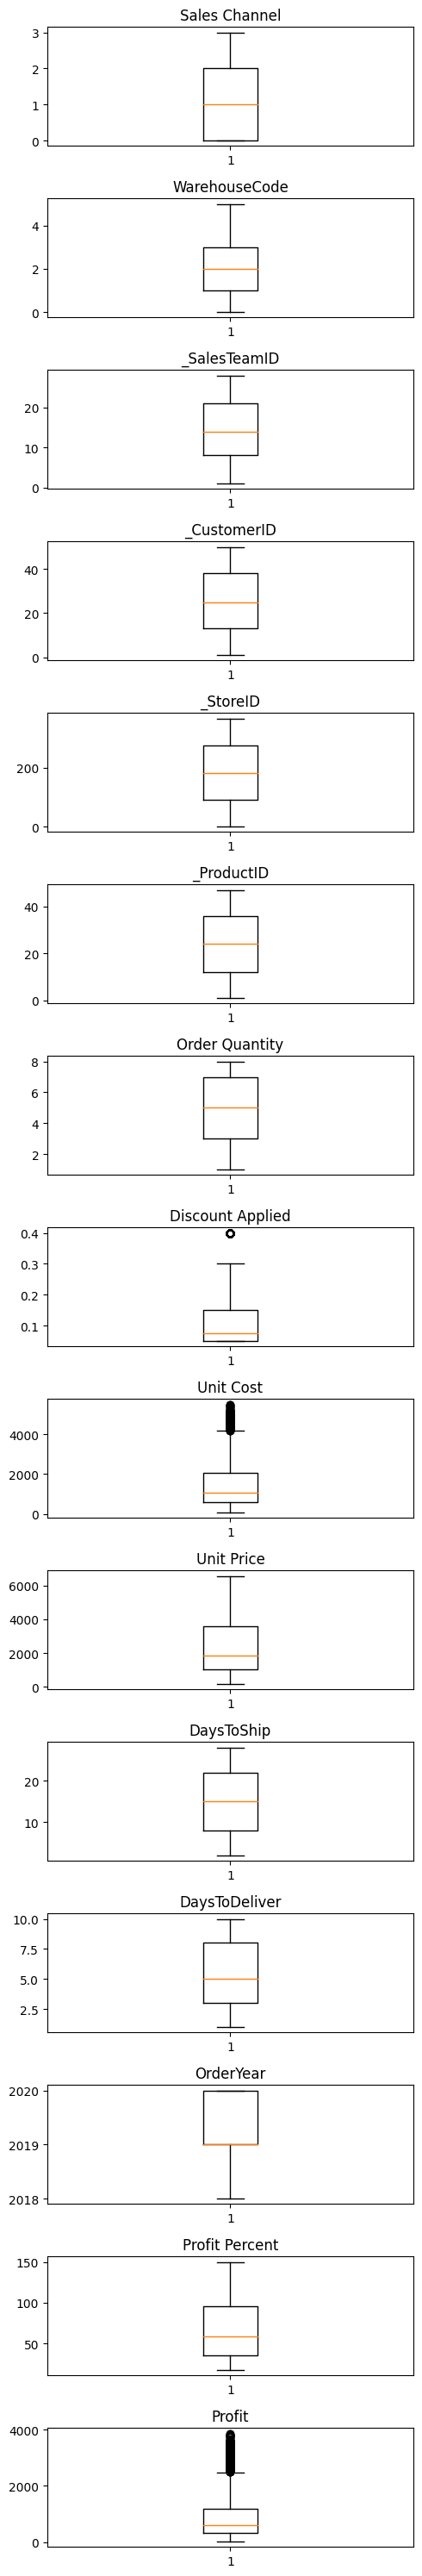

In [23]:
fig, ax = plt.subplots(15, 1, figsize=(5, 30))
for i in range(len(us_sales_data.columns)):
    ax[i].boxplot(us_sales_data.iloc[:,i])
    ax[i].set_title(us_sales_data.columns[i])
fig.tight_layout()

In [24]:
# Removing Outliers
Q1 = us_sales_data.quantile(0.15)
Q3 = us_sales_data.quantile(0.85)
IQR = Q3 - Q1

# Define a mask for the outliers
outlier_mask = (us_sales_data < (Q1 - 1.5 * IQR)) | (us_sales_data > (Q3 + 1.5 * IQR))

# Apply the mask to remove outliers
us_sales_data = us_sales_data[~outlier_mask.any(axis=1)]

us_sales_data

,Sales Channel,WarehouseCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,DaysToShip,DaysToDeliver,OrderYear,Profit Percent,Profit
0,0,0,6,15,259,12,5,0.075,1001.18,1963.1,14.0,5.0,2018,96.078627,961.92
1,1,1,14,20,196,27,3,0.075,3348.66,3939.6,22.0,10.0,2018,17.647059,590.94
2,2,0,21,16,213,16,1,0.050,781.22,1775.5,21.0,10.0,2018,127.272727,994.28
3,3,1,28,48,107,23,8,0.075,1464.69,2324.9,2.0,5.0,2018,58.729834,860.21
4,2,1,22,49,111,26,8,0.100,1476.14,1822.4,16.0,10.0,2018,23.457125,346.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,0,4,9,41,339,29,1,0.075,121.94,234.5,8.0,7.0,2020,92.307692,112.56
7987,1,1,14,29,202,3,6,0.050,1921.56,3202.6,3.0,2.0,2020,66.666667,1281.04
7988,1,0,14,32,241,35,5,0.200,2792.76,3825.7,24.0,3.0,2020,36.986350,1032.94
7989,1,1,20,42,112,36,8,0.100,804.00,1072.0,21.0,5.0,2020,33.333333,268.00


In [25]:
us_sales_data.describe()

,Sales Channel,WarehouseCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,DaysToShip,DaysToDeliver,OrderYear,Profit Percent,Profit
count,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000
mean,0.982949,1.996364,14.385406,25.450100,183.870612,23.782974,4.525827,0.114399,1429.633187,2276.787851,15.169509,5.504890,2019.162111,67.326539,847.154664
std,1.015965,1.519647,7.988466,14.412639,105.872998,13.526944,2.312476,0.085547,1112.209612,1665.084709,7.794853,2.855557,0.771384,37.590776,717.413984
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,68.680000,167.500000,2.000000,1.000000,2018.000000,17.642927,25.120000
25%,0.000000,1.000000,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000,604.340000,1031.800000,8.000000,3.000000,2019.000000,35.135135,334.967500
50%,1.000000,2.000000,14.000000,25.000000,183.000000,24.000000,5.000000,0.075000,1078.160000,1849.200000,15.000000,5.000000,2019.000000,58.730002,601.355000
75%,2.000000,3.000000,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000,2033.850000,3586.175000,22.000000,8.000000,2020.000000,96.077742,1194.022500
max,3.000000,5.000000,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000,5498.560000,6566.000000,28.000000,10.000000,2020.000000,150.000000,3609.420000


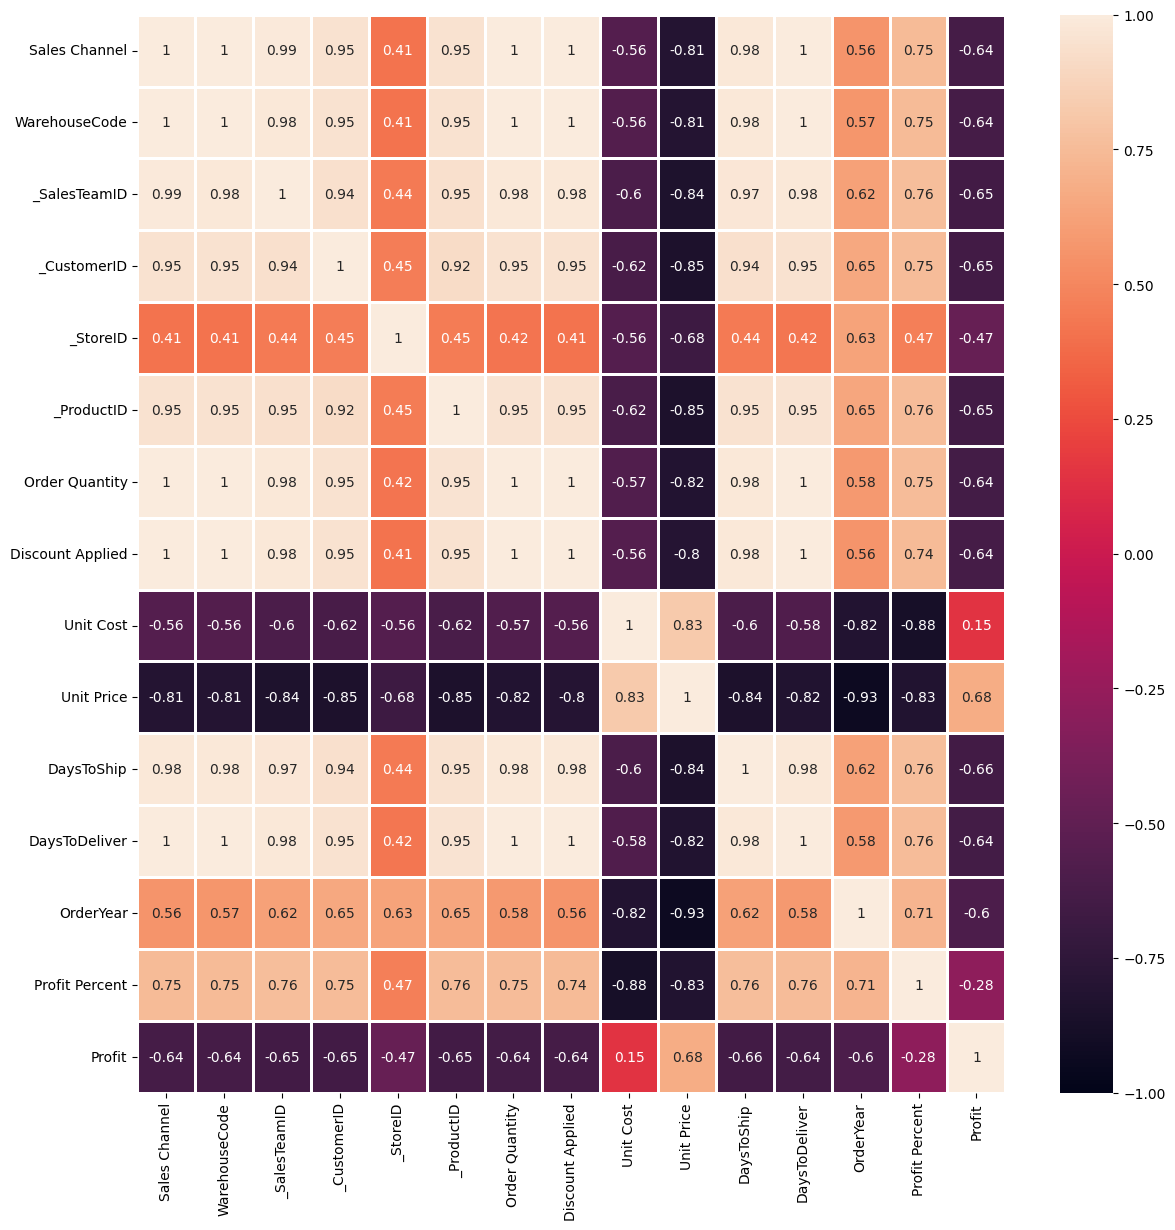

In [27]:
def standardize(column):
  return (column - column.mean()) / column.std()
std_us_sales = us_sales_data.apply(standardize, axis=1)
corr_matrix = std_us_sales.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, linewidth = 1)
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

X = us_sales_data.drop(['Sales Channel', "WarehouseCode", "Order Quantity", "Discount Applied", "DaysToDeliver"], axis=1)
y = us_sales_data['Sales Channel']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9667919799498746


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
k_values = list(range(1, 51))
k_final = 0
final_accuracy = 0

n_folds = 2
# Create a KFold object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)


for k in k_values:
    cv_scores = []
    
    for train_index, test_index in kf.split(X_train):
        # Split the data into training and validation sets for this fold
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Create a k-NN classifier with the current k value
        knn = KNeighborsClassifier(n_neighbors=k)
    
        # Train the k-NN classifier on the training set
        knn.fit(X_train_fold, y_train_fold)
    
        # Evaluate the k-NN classifier on the validation set
        cv_scores.append(knn.score(X_test_fold, y_test_fold))
    
    # Calculate the mean accuracy across all folds
    mean_accuracy = np.mean(cv_scores)
    
    # Update the best k and best accuracy if a better k is found
    if mean_accuracy > final_accuracy:
        k_final = k
        final_accuracy = mean_accuracy

# Train the best k-NN classifier on the full training data
best_knn = KNeighborsClassifier(n_neighbors=k_final)
best_knn.fit(X_train, y_train)

# Evaluate the best k-NN classifier on the test set
final_accuracy = best_knn.score(X_test, y_test)

print(f"Best accuracy using 2-fold cross-validation: {final_accuracy}")

Best accuracy using 2-fold cross-validation: 0.38032581453634084


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the decision tree classifier with the best hyperparameters
clf = DecisionTreeClassifier(**best_params)

# Make predictions on the data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = np.mean(y_pred == y_test) bjh

print("Accuracy:", accuracy)

Accuracy: 0.9667919799498746
